In [0]:
#Import neccesary packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
np.set_printoptions(edgeitems=10)
np.core.arrayprint._line_width = 180


In [2]:
#Read in training data set
df = pd.read_csv('cs-training.csv')

#Explore the variables
print(df.head())
print(df.columns)

#Total obersvations
print(df.shape)
print(df.dtypes)

NameError: name 'pd' is not defined

**Converting dependent variable to categorical type**

In [0]:
df.SeriousDlqin2yrs = (df.SeriousDlqin2yrs).astype('category')

In [49]:
df.describe()

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null category
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: category(1), float64(4), int64(7)
memory usage: 12.7 MB


**Hence, we have NA in MonthlyIncome and NumberOfDependents**

In [51]:
percent_miss_MonthlyIncome = np.round(sum(df['MonthlyIncome'].isna())/df.shape[0],2)
percent_miss_NumberOfDependents = np.round(sum(df['NumberOfDependents'].isna())/df.shape[0],2)
print('percent_miss_MonthlyIncome : {}'.format(percent_miss_MonthlyIncome))
print('percent_miss_NumberOfDependents : {}'.format(percent_miss_NumberOfDependents))

percent_miss_MonthlyIncome : 0.2
percent_miss_NumberOfDependents : 0.03



**Dealing with Missing Values
We got missing values for Monthly Income and Number of Dependants. 
Monthly Income only has 80 percent values filled but intuitively, is important to predict credit score. 
So we will not drop this variable and find the best way to replace nulls.**


**In below code, we will subset datas having missing/not missing income and then visualize how other variables are distributed for both subsets**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


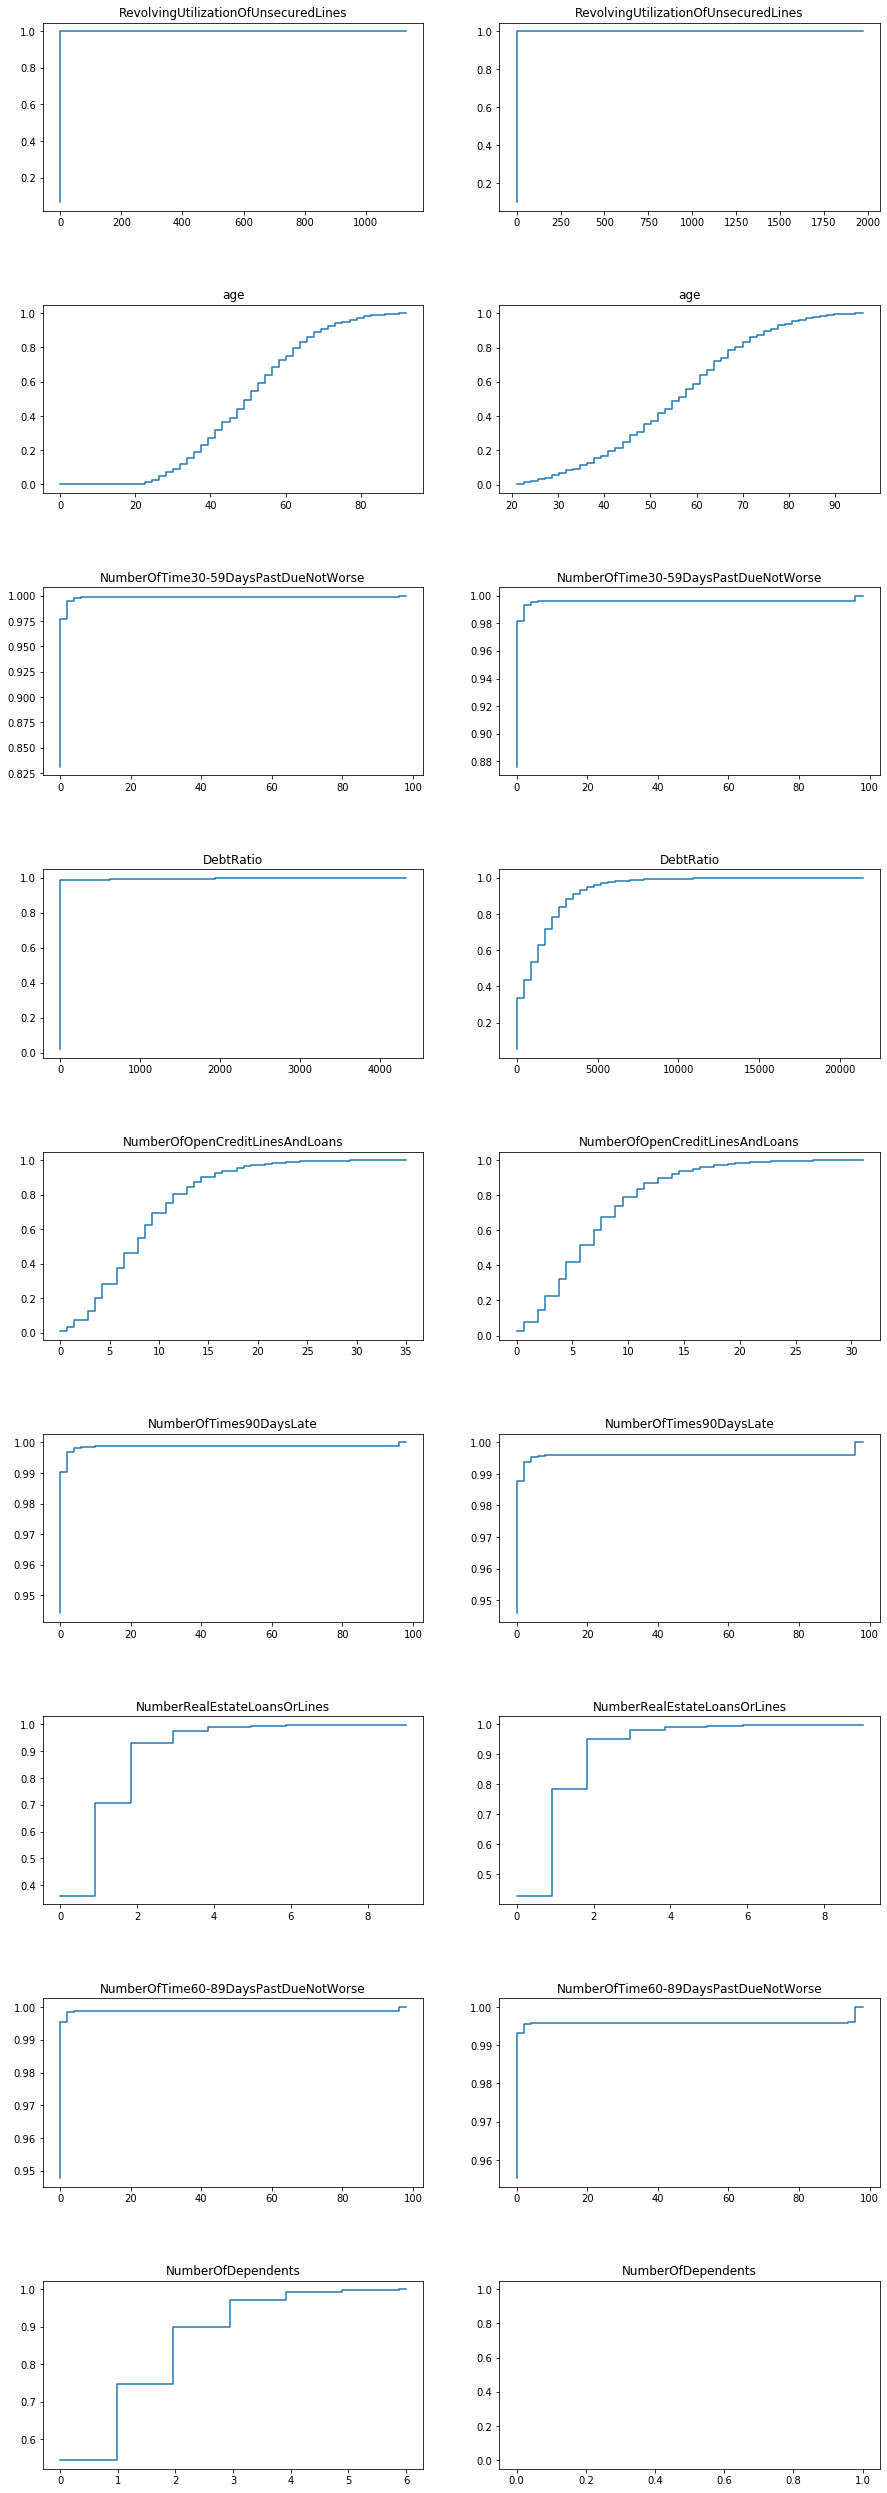

In [52]:
df_mis_inc = df[df['MonthlyIncome'].isna()]
df_not_mis_inc = df[df['MonthlyIncome'].notna()]
varNames = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
def visualizeECDF( variable,data):
    df = data[:] 
    ecdf = ECDF(df[variable])
    x = np.linspace(min(df[variable]), np.percentile(df[variable],99.9))
    y = ecdf(x)
    plt.step(x, y)

np.random.seed(100)
fig, axes = plt.subplots(nrows=10, ncols=2)
fig.tight_layout()
fig.set_figheight(45)
fig.set_figwidth(15)

plt.subplots_adjust(hspace=0.5)
for i in [1,3,5,7,9,11,13,15,17]:
  ax = plt.subplot(9,2,i)
  ax.set_title(varNames[(i-1)//2])
  visualizeECDF(varNames[(i-1)//2], data = df_not_mis_inc)

  ax = plt.subplot(9,2,i+1)
  ax.set_title(varNames[(i-1)//2])
  visualizeECDF(varNames[(i-1)//2], data = df_mis_inc)


**We found that all other variables are having similar distributions for both subsets, except DebtRatio and NumberOfDependents**

**We will also visualize how DebtRatio is distributed Overall**

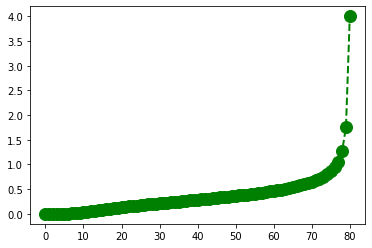

In [53]:
perc = range(81)
val = []
for i in perc:
  val.append(np.percentile(df['DebtRatio'],i ))

import matplotlib.pyplot as plt
plt.plot(perc, val, 'go--', linewidth=2, markersize=12)

**In below code and visualization, we will see that DebtRatio of missing income subset has same distribution as top 1 percentile DebtRatio values of other subset**

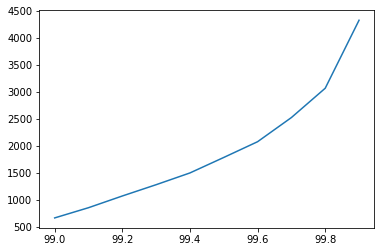

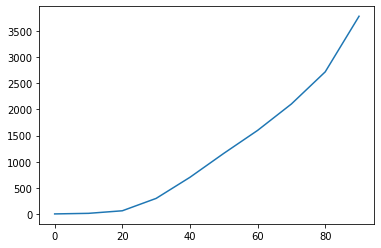

In [54]:
perc1 = [99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9]
perc2 = [0,10,20,30,40,50,60,70,80,90]


val1 = []
val2 = []

for i in perc1:
  val1.append(np.percentile(df_not_mis_inc['DebtRatio'],i))
  
for i in perc2:
  val2.append(np.percentile(df_mis_inc['DebtRatio'],i))

plt.plot(perc1,val1)
plt.show()


plt.plot(perc2,val2)
plt.show()


**Hence, it is clear that the DebtRatio of missing income subset has same distribution as top 1 percentile DebtRatio values of other subset**

**Now let's explore how NumberOfDependents can help to replace missing values of MOnthlyIncome**

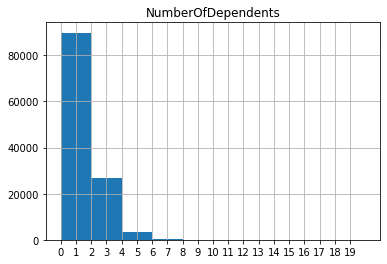

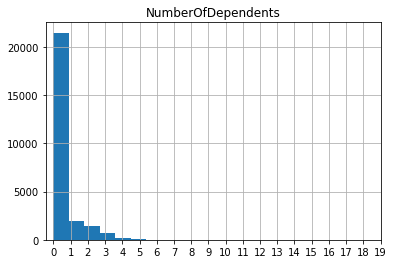

In [55]:
df_not_mis_inc.hist('NumberOfDependents')
plt.xticks(np.arange(0, 20, 1));

df_mis_inc.hist('NumberOfDependents')
plt.xticks(np.arange(0, 20, 1));

In [56]:
print(df_mis_inc['NumberOfDependents'].value_counts())

print(df_not_mis_inc.loc[df_not_mis_inc['NumberOfDependents'] == 0 , ['MonthlyIncome']].mean())
print(df_not_mis_inc.loc[df_not_mis_inc['NumberOfDependents'] == 1 , ['MonthlyIncome']].mean())
print(df_not_mis_inc.loc[df_not_mis_inc['NumberOfDependents'] > 1 , ['MonthlyIncome']].mean())
      
      
#[['NumberOfDependents','MonthlyIncome']].corr())
#print(df_mis_inc[['DebtRatio','MonthlyIncome']].corr()


0.0    21446
1.0     1937
2.0     1412
3.0      738
4.0      204
5.0       57
6.0        8
7.0        2
8.0        2
9.0        1
Name: NumberOfDependents, dtype: int64
MonthlyIncome    5873.411467
dtype: float64
MonthlyIncome    7205.172361
dtype: float64
MonthlyIncome    7955.44194
dtype: float64


**Clearly, the majority of the number of dependents is 0 in case of missing MonthlyIncome. We also explored how MonthlyIncome varies with NoOfDependents using the other subset.
The difference is not of very high order as in the case of DebtRatio.
Hence, we are deciding to impute missing MOnthlyIncome data based on top 1 percentile of DebtRatio**

In [57]:
df_not_mis_inc.sort_values(by='DebtRatio',ascending=False)[0:1200]['MonthlyIncome'].mean()

0.23916666666666667

**Hence, we will be replacing missing Income values with 0 (~0.239)**

In [0]:
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(0)

**Now let's explore the missing values in NumberOfDependents**

In [59]:
df[df['NumberOfDependents'].isna()].describe()

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000,3924.0,3924.000000,3924.000000,3924.000000,3924.000000,0.0
mean,74510.281855,10.745132,59.588940,0.908257,1083.812181,0.0,5.604230,0.834608,0.590979,0.812181,NaN
std,43703.084554,237.699246,18.634168,8.679394,4186.731843,0.0,4.096353,8.679228,0.914455,8.678008,NaN
min,9.000000,0.000000,21.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,NaN
25%,36006.500000,0.008474,48.000000,0.000000,21.000000,0.0,3.000000,0.000000,0.000000,0.000000,NaN
50%,74492.000000,0.047458,61.000000,0.000000,358.000000,0.0,5.000000,0.000000,0.000000,0.000000,NaN
75%,112734.000000,0.268155,74.000000,0.000000,1559.000000,0.0,8.000000,0.000000,1.000000,0.000000,NaN
max,149966.000000,10821.000000,109.000000,98.000000,220516.000000,0.0,30.000000,98.000000,15.000000,98.000000,NaN


In [60]:

df[df['NumberOfDependents'].notna()].describe()

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,146076.000000,146076.000000,146076.000000,146076.000000,146076.000000,1.460760e+05,146076.000000,146076.000000,146076.000000,146076.000000,146076.000000
mean,75013.668597,5.922272,52.099277,0.407945,333.373603,5.491805e+03,8.529279,0.250698,1.029717,0.225027,0.757222
std,43290.647551,250.070774,14.604005,4.002747,1943.906679,1.329790e+04,5.149533,3.977197,1.132774,3.962048,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37534.750000,0.031018,41.000000,0.000000,0.171764,1.957750e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75013.500000,0.158818,52.000000,0.000000,0.357751,4.500000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112496.250000,0.563684,62.000000,0.000000,0.766117,7.500000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,50708.000000,107.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


**Distribution of all vars is same for the rows having missing NumberOfDependents var.
Hence, we are deciding to impute the missing value by median**

In [61]:
#We see a lot of 0's and 1's. It makes sense to replace missing values as 0s
print(df['NumberOfDependents'].value_counts())
df['NumberOfDependents'] = df['NumberOfDependents'].fillna(0) 
#Now we have got rid of missing values

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64


**Now let's check for outliers**

In [63]:
df1=df[:]
#print(df1.dtypes)
#df1.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis = 1)                        
df1=df1[list(set(df.columns)-set(['Unnamed: 0','SeriousDlqin2yrs']))]
#print(df.dtypes)
print(df1.dtypes)


NumberOfTimes90DaysLate                   int64
MonthlyIncome                           float64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
RevolvingUtilizationOfUnsecuredLines    float64
NumberOfOpenCreditLinesAndLoans           int64
DebtRatio                               float64
NumberOfTime30-59DaysPastDueNotWorse      int64
age                                       int64
dtype: object


**Using the boxplot method to detect ooutliers**

In [0]:
cols = df1.columns
for i in cols:
  Low_Bound = ((np.percentile(df[i],25)) - 1.5*np.subtract(*np.percentile(df[i],[75,25])))
  Upp_Bound = ((np.percentile(df[i],75)) + 1.5*np.subtract(*np.percentile(df[i],[75,25])))
  df1[i] = df[i].apply(lambda x : 1 if(x < Low_Bound or x > Upp_Bound) else 0 )




In [65]:
#print(df1.dtypes)
#print(df1.columns)
print(df1.sum(axis = 0, skipna = True))



NumberOfTimes90DaysLate                  8338
MonthlyIncome                            4264
NumberRealEstateLoansOrLines              793
NumberOfTime60-89DaysPastDueNotWorse     7604
NumberOfDependents                      13336
RevolvingUtilizationOfUnsecuredLines      763
NumberOfOpenCreditLinesAndLoans          3980
DebtRatio                               31311
NumberOfTime30-59DaysPastDueNotWorse    23982
age                                        46
dtype: int64


**There are lots of outliers in each var**

In [0]:
miss_any_rows = (df1.sum(axis = 1, skipna = True))

In [67]:
#type(miss_any_rows)
miss_any_rows = miss_any_rows.apply(lambda x : 1 if x>0 else 0)
print(sum(miss_any_rows))
print(sum(miss_any_rows)/df.shape[0])


70536
0.47024


Hence, overall, we have ~47% datatpoints having one or more outliers.
We can't remove this much data.
Hence, let's just loook at the vars having strong correlation with our dependent var**

In [0]:
#np.abs(corr.SeriousDlqin2yrs).sort_values(ascending=False)


In [68]:
df2 = df1[['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate','age','NumberOfTime60-89DaysPastDueNotWorse']]
print(df2.dtypes)
print(df2)
miss_any_rows = (df2.sum(axis = 1, skipna = True))
miss_any_rows = miss_any_rows.apply(lambda x : 1 if x>0 else 0)
print(sum(miss_any_rows))
print(sum(miss_any_rows)/df.shape[0])

NumberOfTime30-59DaysPastDueNotWorse    int64
NumberOfTimes90DaysLate                 int64
age                                     int64
NumberOfTime60-89DaysPastDueNotWorse    int64
dtype: object
        NumberOfTime30-59DaysPastDueNotWorse  ...  NumberOfTime60-89DaysPastDueNotWorse
0                                          1  ...                                     0
1                                          0  ...                                     0
2                                          1  ...                                     0
3                                          0  ...                                     0
4                                          1  ...                                     0
...                                      ...  ...                                   ...
149995                                     0  ...                                     0
149996                                     0  ...                                     0
149997    

In [69]:
(df2.sum(axis = 0, skipna = True))

NumberOfTime30-59DaysPastDueNotWorse    23982
NumberOfTimes90DaysLate                  8338
age                                        46
NumberOfTime60-89DaysPastDueNotWorse     7604
dtype: int64

**Still we have 20% data to be removed. We won't do that**

**Let's now look at distribution of all vars**

In [70]:
print(df['NumberOfTime30-59DaysPastDueNotWorse'].nunique())
print(df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts().sort_index())
             
print(df['NumberOfTimes90DaysLate'].nunique())
print(df['NumberOfTimes90DaysLate'].value_counts().sort_index())

print(df['NumberOfTime60-89DaysPastDueNotWorse'].nunique())
print(df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts().sort_index())


16
0     126018
1      16033
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64
19
0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: NumberOfTimes90DaysLate, dtype: int64
13
0     142396
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
9          1
11         1
96         5
98       264
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64


**Capping as required**

In [0]:
df.loc[df['NumberOfTime30-59DaysPastDueNotWorse']>20,'NumberOfTime30-59DaysPastDueNotWorse'] = 20
df.loc[df['NumberOfTimes90DaysLate']>20,'NumberOfTimes90DaysLate'] = 20
df.loc[df['NumberOfTime60-89DaysPastDueNotWorse']>20,'NumberOfTime60-89DaysPastDueNotWorse'] = 20

In [72]:
print(df['NumberRealEstateLoansOrLines'].nunique())
print(df['NumberRealEstateLoansOrLines'].value_counts().sort_index())
             
print(df['age'].nunique())
print(df['age'].value_counts().sort_index())

print(df['NumberOfDependents'].nunique())
print(df['NumberOfDependents'].value_counts().sort_index())

print(df['NumberOfOpenCreditLinesAndLoans'].nunique())
print(df['NumberOfOpenCreditLinesAndLoans'].value_counts().sort_index())

28
0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
14        7
15        7
16        4
17        4
18        2
19        2
20        2
21        1
23        2
25        3
26        1
29        1
32        1
54        1
Name: NumberRealEstateLoansOrLines, dtype: int64
86
0        1
21     183
22     434
23     641
24     816
      ... 
102      3
103      3
105      1
107      1
109      2
Name: age, Length: 86, dtype: int64
13
0.0     90826
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64
58
0      1888
1      4438
2      6666
3      9058
4     11609
5     12931
6     13614
7     13245
8     12562
9     11355
10     9624
11     8321
12     7005
13     5667
14     4546
15     3645
16     3000
17     2370
18     18

**Capping as required**

In [0]:
df.loc[df['NumberRealEstateLoansOrLines']>30,'NumberRealEstateLoansOrLines'] = 30
df.loc[df['NumberOfOpenCreditLinesAndLoans']>40,'NumberOfOpenCreditLinesAndLoans'] = 40


**Now, let's look at distribution of the remaining 3 continuour vars**

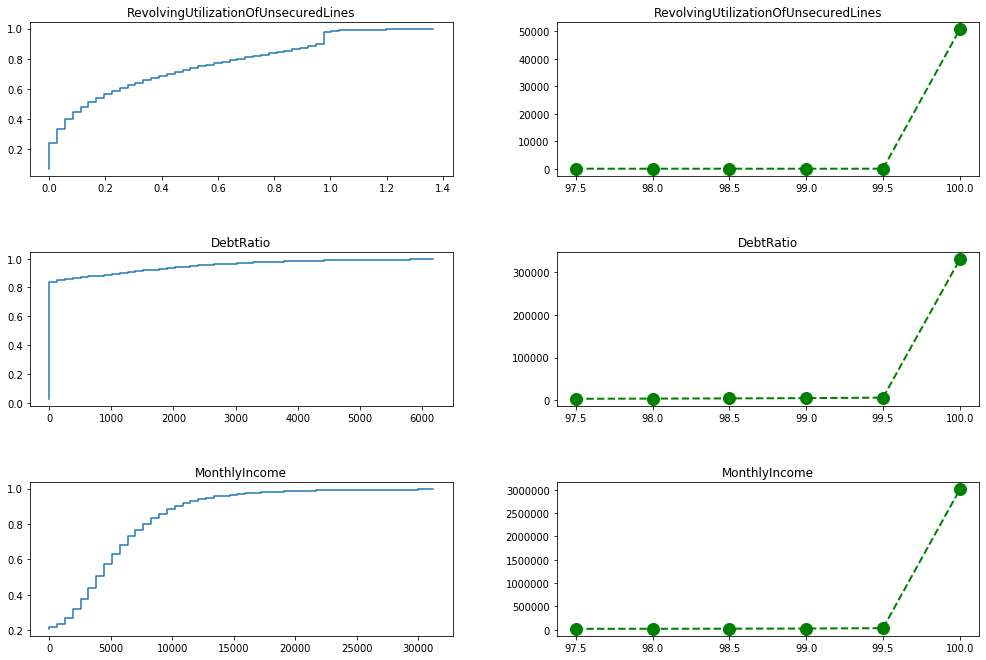

In [74]:
varNames = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome']

import matplotlib.pyplot as plt
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
def visualizeECDF( variable,data):
    df = data[:] 
    ecdf = ECDF(df[variable])
    x = np.linspace(min(df[variable]), np.percentile(df[variable],99.5))
    y = ecdf(x)
    plt.step(x, y)

np.random.seed(100)
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.tight_layout()
fig.set_figheight(10)
fig.set_figwidth(15)

plt.subplots_adjust(hspace=0.5)

ax = plt.subplot(3,2,1)
ax.set_title(varNames[0])
visualizeECDF(varNames[0], data = df)


perc = [97.5,98,98.5,99,99.5,100]
val = []
for i in perc:
  val.append(np.percentile(df['RevolvingUtilizationOfUnsecuredLines'],i ))
ax = plt.subplot(3,2,2)
ax.set_title(varNames[0])
plt.plot(perc, val, 'go--', linewidth=2, markersize=12)



ax = plt.subplot(3,2,3)
ax.set_title(varNames[1])
visualizeECDF(varNames[1], data = df)


perc = [97.5,98,98.5,99,99.5,100]
val = []
for i in perc:
  val.append(np.percentile(df['DebtRatio'],i ))
ax = plt.subplot(3,2,4)
ax.set_title(varNames[1])
plt.plot(perc, val, 'go--', linewidth=2, markersize=12)



ax = plt.subplot(3,2,5)
ax.set_title(varNames[2])
visualizeECDF(varNames[2], data = df)


perc = [97.5,98,98.5,99,99.5,100]
val = []
for i in perc:
  val.append(np.percentile(df['MonthlyIncome'],i ))
ax = plt.subplot(3,2,6)
ax.set_title(varNames[2])
plt.plot(perc, val, 'go--', linewidth=2, markersize=12)


In [76]:
df1 = df[['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome']]


var1_cap = np.percentile(df['RevolvingUtilizationOfUnsecuredLines'],99.5)
var2_cap = np.percentile(df['DebtRatio'],99.5)
var3_cap = np.percentile(df['MonthlyIncome'],99.5)
print(var1_cap)
print(var2_cap)
print(var3_cap)


df1['RevolvingUtilizationOfUnsecuredLines'] = df1['RevolvingUtilizationOfUnsecuredLines'].apply(lambda x : x if x<=var1_cap else var1_cap)
df1['DebtRatio'] = df1['DebtRatio'].apply(lambda x : x if x<=var1_cap else var1_cap)
df1['MonthlyIncome'] = df1['MonthlyIncome'].apply(lambda x : x if x<=var1_cap else var1_cap)


1.366269304065009
8.730207211562034
31250.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

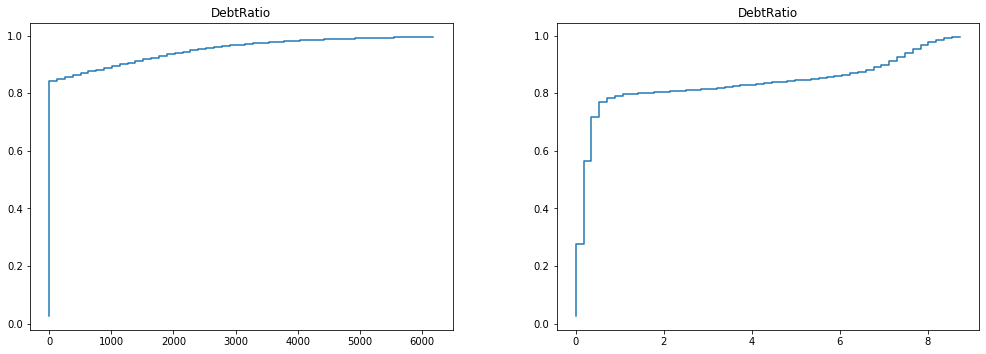

In [75]:


import matplotlib.pyplot as plt
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
def visualizeECDF( variable,data):
    df = data[:] 
    ecdf = ECDF(df[variable])
    x = np.linspace(min(df[variable]), np.percentile(df[variable],99.5))
    y = ecdf(x)
    plt.step(x, y)

np.random.seed(100)
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(15)

plt.subplots_adjust(hspace=0.5)

ax = plt.subplot(1,2,1)
ax.set_title('DebtRatio')
visualizeECDF('DebtRatio', data = df)


df['DebtRatio'] = np.log(df['DebtRatio']+1)


ax = plt.subplot(1,2,2)
ax.set_title('DebtRatio')
visualizeECDF('DebtRatio', data = df)
